In [1]:
import pandas as pd

df=pd.read_csv('MatrizTopics_LDA_index_fecha_1.csv', delimiter=';')

#tipo de dato
#type(df['FECHA'].iloc[0])
#formato de fecha
df['Date']= pd.to_datetime(df['FECHA'],format="%d/%m/%Y")
df = df.sort_values(by=['Date'])
df

,id,FECHA,1,2,3,4,5,6,7,8,...,12,13,14,15,16,17,18,19,20,Date
25469,25469,06/01/2015,0.000222,0.172790,0.469906,0.000222,0.000222,0.000222,0.097926,0.000222,...,0.000222,0.000222,0.000222,0.000222,0.140283,0.067250,0.000222,0.000222,0.000222,2015-01-06
22075,22075,26/02/2015,0.316065,0.000694,0.000694,0.033692,0.000694,0.000694,0.535750,0.000694,...,0.000694,0.000694,0.000694,0.000694,0.000694,0.000694,0.000694,0.000694,0.000694,2015-02-26
24857,24857,18/05/2015,0.000368,0.000368,0.000368,0.093248,0.000368,0.000368,0.029088,0.815238,...,0.000368,0.000368,0.000368,0.000368,0.000368,0.000368,0.056543,0.000368,0.000368,2015-05-18
22274,22274,18/05/2015,0.000298,0.000298,0.000298,0.000298,0.000298,0.000298,0.120299,0.000298,...,0.000298,0.000298,0.160528,0.000298,0.000298,0.000298,0.520175,0.194237,0.000298,2015-05-18
22273,22273,18/05/2015,0.000658,0.000658,0.000658,0.000658,0.000658,0.000658,0.300942,0.000658,...,0.000658,0.000658,0.177497,0.000658,0.000658,0.000658,0.510377,0.000658,0.000658,2015-05-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28698,28698,26/04/2019,0.000342,0.062992,0.000342,0.000342,0.000342,0.000342,0.741074,0.000342,...,0.000342,0.105566,0.000342,0.000342,0.000342,0.000342,0.000342,0.000342,0.000342,2019-04-26
28714,28714,26/04/2019,0.051618,0.039024,0.000172,0.000172,0.000172,0.131093,0.190868,0.000172,...,0.000172,0.118588,0.000172,0.180213,0.000172,0.008741,0.156052,0.000172,0.000172,2019-04-26
28693,28693,26/04/2019,0.000617,0.157081,0.000617,0.000617,0.000617,0.000617,0.000617,0.000617,...,0.000617,0.000617,0.000617,0.211743,0.000617,0.000617,0.072508,0.373894,0.000617,2019-04-26
28703,28703,26/04/2019,0.000658,0.000658,0.000658,0.047664,0.000658,0.000658,0.862033,0.000658,...,0.000658,0.000658,0.000658,0.000658,0.000658,0.000658,0.000658,0.000658,0.000658,2019-04-26


In [2]:
df_bolsa=pd.read_csv('IBEX.csv', delimiter=',')
df_bolsa

#tipo de dato
#type(df_bolsa['Date'].iloc[0])
#formato de fecha
df_bolsa['Date']=pd.to_datetime(df_bolsa['Date'])



In [3]:
#Prediccion por dia completo
#Preparamos las columnas para agrupar
df= df.iloc[:,1:]
df

,FECHA,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,Date
25469,06/01/2015,0.000222,0.172790,0.469906,0.000222,0.000222,0.000222,0.097926,0.000222,0.000222,...,0.000222,0.000222,0.000222,0.000222,0.140283,0.067250,0.000222,0.000222,0.000222,2015-01-06
22075,26/02/2015,0.316065,0.000694,0.000694,0.033692,0.000694,0.000694,0.535750,0.000694,0.000694,...,0.000694,0.000694,0.000694,0.000694,0.000694,0.000694,0.000694,0.000694,0.000694,2015-02-26
24857,18/05/2015,0.000368,0.000368,0.000368,0.093248,0.000368,0.000368,0.029088,0.815238,0.000368,...,0.000368,0.000368,0.000368,0.000368,0.000368,0.000368,0.056543,0.000368,0.000368,2015-05-18
22274,18/05/2015,0.000298,0.000298,0.000298,0.000298,0.000298,0.000298,0.120299,0.000298,0.000298,...,0.000298,0.000298,0.160528,0.000298,0.000298,0.000298,0.520175,0.194237,0.000298,2015-05-18
22273,18/05/2015,0.000658,0.000658,0.000658,0.000658,0.000658,0.000658,0.300942,0.000658,0.000658,...,0.000658,0.000658,0.177497,0.000658,0.000658,0.000658,0.510377,0.000658,0.000658,2015-05-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28698,26/04/2019,0.000342,0.062992,0.000342,0.000342,0.000342,0.000342,0.741074,0.000342,0.000342,...,0.000342,0.105566,0.000342,0.000342,0.000342,0.000342,0.000342,0.000342,0.000342,2019-04-26
28714,26/04/2019,0.051618,0.039024,0.000172,0.000172,0.000172,0.131093,0.190868,0.000172,0.121914,...,0.000172,0.118588,0.000172,0.180213,0.000172,0.008741,0.156052,0.000172,0.000172,2019-04-26
28693,26/04/2019,0.000617,0.157081,0.000617,0.000617,0.000617,0.000617,0.000617,0.000617,0.175515,...,0.000617,0.000617,0.000617,0.211743,0.000617,0.000617,0.072508,0.373894,0.000617,2019-04-26
28703,26/04/2019,0.000658,0.000658,0.000658,0.047664,0.000658,0.000658,0.862033,0.000658,0.000658,...,0.000658,0.000658,0.000658,0.000658,0.000658,0.000658,0.000658,0.000658,0.000658,2019-04-26


In [4]:
#Predicción del dia siguiente

df['Date']= df['Date'] + pd.DateOffset(1)


In [3]:
#Prediccion por dia completo
df = df.groupby(by=['FECHA','Date']).mean()
df = df.sort_values(by=['FECHA'])
df

,,id,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
FECHA,Date,,,,,,,,,,,,,,,,,,,,,
01/01/2016,2016-01-01,28389.000000,0.000356,0.056794,0.000356,0.000356,0.000356,0.000356,0.097814,0.334267,0.049597,...,0.115101,0.000356,0.071706,0.000356,0.119176,0.000356,0.000356,0.000356,0.000356,0.143919
01/01/2017,2017-01-01,20400.000000,0.115911,0.066430,0.022957,0.049759,0.000380,0.151208,0.045247,0.113524,0.016459,...,0.000380,0.000380,0.206841,0.012790,0.029753,0.003193,0.032559,0.000380,0.120941,0.010526
01/01/2018,2018-01-01,13139.000000,0.053781,0.000283,0.000283,0.021017,0.048126,0.000283,0.082261,0.021313,0.031609,...,0.050787,0.111651,0.061228,0.000283,0.121608,0.004580,0.000283,0.246005,0.108910,0.035429
01/01/2019,2019-01-01,20537.000000,0.000455,0.000455,0.282173,0.000455,0.000455,0.000455,0.000455,0.000455,0.000455,...,0.452245,0.000455,0.000455,0.000455,0.000455,0.000455,0.000455,0.067945,0.190364,0.000455
01/02/2016,2016-02-01,23168.076923,0.037678,0.000496,0.041955,0.042831,0.006045,0.076014,0.143528,0.042889,0.012395,...,0.057629,0.125512,0.069053,0.021005,0.117740,0.012658,0.007651,0.047739,0.075542,0.023451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31/10/2018,2018-10-31,21144.541667,0.040107,0.019614,0.051828,0.033084,0.032180,0.037809,0.189394,0.074289,0.055160,...,0.031045,0.055198,0.020824,0.017479,0.023670,0.060194,0.010499,0.100593,0.087062,0.000546
31/12/2015,2015-12-31,9532.000000,0.005129,0.084632,0.016598,0.032679,0.008562,0.027859,0.020161,0.072021,0.004316,...,0.006263,0.410637,0.016033,0.051332,0.023890,0.003757,0.000661,0.005643,0.041673,0.130411
31/12/2016,2016-12-31,17236.857143,0.080274,0.087130,0.069599,0.050918,0.070395,0.050890,0.082978,0.134852,0.029216,...,0.067579,0.025447,0.037830,0.016346,0.043289,0.011286,0.013725,0.030545,0.037850,0.041737


In [4]:
#Comprobación que la suma del porcentaje de importancia de cada topic supa 1 por columna.
df["sum"] = df[:].sum(axis=1)
df

,id,FECHA,1,2,3,4,5,6,7,8,...,13,14,15,16,17,18,19,20,Date,sum
25469,25469,06/01/2015,0.000222,0.172790,0.469906,0.000222,0.000222,0.000222,0.097926,0.000222,...,0.000222,0.000222,0.000222,0.140283,0.067250,0.000222,0.000222,0.000222,2015-01-06,25470.0
22075,22075,26/02/2015,0.316065,0.000694,0.000694,0.033692,0.000694,0.000694,0.535750,0.000694,...,0.000694,0.000694,0.000694,0.000694,0.000694,0.000694,0.000694,0.000694,2015-02-26,22076.0
24857,24857,18/05/2015,0.000368,0.000368,0.000368,0.093248,0.000368,0.000368,0.029088,0.815238,...,0.000368,0.000368,0.000368,0.000368,0.000368,0.056543,0.000368,0.000368,2015-05-18,24858.0
22274,22274,18/05/2015,0.000298,0.000298,0.000298,0.000298,0.000298,0.000298,0.120299,0.000298,...,0.000298,0.160528,0.000298,0.000298,0.000298,0.520175,0.194237,0.000298,2015-05-18,22275.0
22273,22273,18/05/2015,0.000658,0.000658,0.000658,0.000658,0.000658,0.000658,0.300942,0.000658,...,0.000658,0.177497,0.000658,0.000658,0.000658,0.510377,0.000658,0.000658,2015-05-18,22274.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28698,28698,26/04/2019,0.000342,0.062992,0.000342,0.000342,0.000342,0.000342,0.741074,0.000342,...,0.105566,0.000342,0.000342,0.000342,0.000342,0.000342,0.000342,0.000342,2019-04-26,28699.0
28714,28714,26/04/2019,0.051618,0.039024,0.000172,0.000172,0.000172,0.131093,0.190868,0.000172,...,0.118588,0.000172,0.180213,0.000172,0.008741,0.156052,0.000172,0.000172,2019-04-26,28715.0
28693,28693,26/04/2019,0.000617,0.157081,0.000617,0.000617,0.000617,0.000617,0.000617,0.000617,...,0.000617,0.000617,0.211743,0.000617,0.000617,0.072508,0.373894,0.000617,2019-04-26,28694.0
28703,28703,26/04/2019,0.000658,0.000658,0.000658,0.047664,0.000658,0.000658,0.862033,0.000658,...,0.000658,0.000658,0.000658,0.000658,0.000658,0.000658,0.000658,0.000658,2019-04-26,28704.0


In [4]:
# Join por fecha para unir los registros de la Bolsa con los registros de topics
df_merge = pd.merge(df_bolsa,df,on='Date')
df_merge


,Date,Open,High,Low,Close,Adj Close,Volume,FECHA,1,2,...,11,12,13,14,15,16,17,18,19,20
0,2015-01-06,10040.700195,10060.799805,9871.099609,9871.099609,9871.089844,282855400.0,06/01/2015,0.000222,0.172790,...,0.048734,0.000222,0.000222,0.000222,0.000222,0.140283,0.067250,0.000222,0.000222,0.000222
1,2015-02-26,11023.299805,11145.900391,11014.400391,11139.500000,11139.488281,271208100.0,26/02/2015,0.316065,0.000694,...,0.103382,0.000694,0.000694,0.000694,0.000694,0.000694,0.000694,0.000694,0.000694,0.000694
2,2015-05-18,11336.799805,11368.000000,11203.099609,11345.000000,11344.988281,234028800.0,18/05/2015,0.000368,0.000368,...,0.000368,0.000368,0.000368,0.000368,0.000368,0.000368,0.000368,0.056543,0.000368,0.000368
3,2015-05-18,11336.799805,11368.000000,11203.099609,11345.000000,11344.988281,234028800.0,18/05/2015,0.000298,0.000298,...,0.000298,0.000298,0.000298,0.160528,0.000298,0.000298,0.000298,0.520175,0.194237,0.000298
4,2015-05-18,11336.799805,11368.000000,11203.099609,11345.000000,11344.988281,234028800.0,18/05/2015,0.000658,0.000658,...,0.000658,0.000658,0.000658,0.177497,0.000658,0.000658,0.000658,0.510377,0.000658,0.000658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29380,2019-04-26,9512.099609,9527.400391,9448.799805,9506.000000,9506.000000,153319300.0,26/04/2019,0.000342,0.062992,...,0.084888,0.000342,0.105566,0.000342,0.000342,0.000342,0.000342,0.000342,0.000342,0.000342
29381,2019-04-26,9512.099609,9527.400391,9448.799805,9506.000000,9506.000000,153319300.0,26/04/2019,0.051618,0.039024,...,0.000172,0.000172,0.118588,0.000172,0.180213,0.000172,0.008741,0.156052,0.000172,0.000172
29382,2019-04-26,9512.099609,9527.400391,9448.799805,9506.000000,9506.000000,153319300.0,26/04/2019,0.000617,0.157081,...,0.000617,0.000617,0.000617,0.000617,0.211743,0.000617,0.000617,0.072508,0.373894,0.000617
29383,2019-04-26,9512.099609,9527.400391,9448.799805,9506.000000,9506.000000,153319300.0,26/04/2019,0.000658,0.000658,...,0.079119,0.000658,0.000658,0.000658,0.000658,0.000658,0.000658,0.000658,0.000658,0.000658


In [63]:
df_merge.insert(0, 'y', df_merge.apply(lambda row: 1 if row['Open'] > row['Close'] else 0, axis=1))

df_merge

,y,Date,Open,High,Low,Close,Adj Close,Volume,FECHA,1,...,11,12,13,14,15,16,17,18,19,20
0,1,2015-01-06,10040.700195,10060.799805,9871.099609,9871.099609,9871.089844,282855400.0,06/01/2015,0.000222,...,0.048734,0.000222,0.000222,0.000222,0.000222,0.140283,0.067250,0.000222,0.000222,0.000222
1,0,2015-02-26,11023.299805,11145.900391,11014.400391,11139.500000,11139.488281,271208100.0,26/02/2015,0.316065,...,0.103382,0.000694,0.000694,0.000694,0.000694,0.000694,0.000694,0.000694,0.000694,0.000694
2,0,2015-05-18,11336.799805,11368.000000,11203.099609,11345.000000,11344.988281,234028800.0,18/05/2015,0.000368,...,0.000368,0.000368,0.000368,0.000368,0.000368,0.000368,0.000368,0.056543,0.000368,0.000368
3,0,2015-05-18,11336.799805,11368.000000,11203.099609,11345.000000,11344.988281,234028800.0,18/05/2015,0.000298,...,0.000298,0.000298,0.000298,0.160528,0.000298,0.000298,0.000298,0.520175,0.194237,0.000298
4,0,2015-05-18,11336.799805,11368.000000,11203.099609,11345.000000,11344.988281,234028800.0,18/05/2015,0.000658,...,0.000658,0.000658,0.000658,0.177497,0.000658,0.000658,0.000658,0.510377,0.000658,0.000658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29380,1,2019-04-26,9512.099609,9527.400391,9448.799805,9506.000000,9506.000000,153319300.0,26/04/2019,0.000342,...,0.084888,0.000342,0.105566,0.000342,0.000342,0.000342,0.000342,0.000342,0.000342,0.000342
29381,1,2019-04-26,9512.099609,9527.400391,9448.799805,9506.000000,9506.000000,153319300.0,26/04/2019,0.051618,...,0.000172,0.000172,0.118588,0.000172,0.180213,0.000172,0.008741,0.156052,0.000172,0.000172
29382,1,2019-04-26,9512.099609,9527.400391,9448.799805,9506.000000,9506.000000,153319300.0,26/04/2019,0.000617,...,0.000617,0.000617,0.000617,0.000617,0.211743,0.000617,0.000617,0.072508,0.373894,0.000617
29383,1,2019-04-26,9512.099609,9527.400391,9448.799805,9506.000000,9506.000000,153319300.0,26/04/2019,0.000658,...,0.079119,0.000658,0.000658,0.000658,0.000658,0.000658,0.000658,0.000658,0.000658,0.000658


In [64]:
y = df_merge['y'].values
X =df_merge.loc[:,'1':].values

df_merge['y'].value_counts()

#505/(505+453)
15439/(15439+13946)

0.5254041177471499

In [66]:
#X, y = load_iris(return_X_y=True)
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier

# Historical Split (last records for testing)
print(X.shape[0])
p = 0.3
test_size = int(X.shape[0] * p)
train_size = X.shape[0] - test_size
print(test_size, train_size)
X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], y[:train_size], y[train_size:]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_train.shape[0]+X_test.shape[0])


#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
model = DummyClassifier(strategy='most_frequent')
y_pred = model.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
print(precision_score(y_test, y_pred, pos_label=1))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

29385
8815 20570
(20570, 20) (8815, 20) (20570,) (8815,) 29385
Number of mislabeled points out of a total 8815 points : 3805
0.5683494044242768
0.5683494044242768
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3805
           1       0.57      1.00      0.72      5010

    accuracy                           0.57      8815
   macro avg       0.28      0.50      0.36      8815
weighted avg       0.32      0.57      0.41      8815



In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


model=DecisionTreeClassifier(max_depth=100)
#model=RandomForestClassifier(max_depth=100, n_estimators=50, max_features=1)

y_pred = model.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
#print(1-((y_test != y_pred).sum()/ X_test.shape[0]))
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, pos_label=1))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Number of mislabeled points out of a total 8815 points : 4347
0.5068633011911514
0.5727771679473106
              precision    recall  f1-score   support

           0       0.44      0.49      0.46      3805
           1       0.57      0.52      0.55      5010

    accuracy                           0.51      8815
   macro avg       0.50      0.50      0.50      8815
weighted avg       0.51      0.51      0.51      8815

[[1859 1946]
 [2401 2609]]


In [10]:
pre=[0,0,0,0,1]
true=[0,0,0,1,1]
confusion_matrix(true,pre)

array([[3, 0],
       [1, 1]])

0.5713847569391197
0.5749300871853923
0.5715505464480874
0.5778788939446973
0.5738659173022882
0.5696277329131377
0.5792293426746342
0.5746460746460746
0.5688869602950749
0.5756586109296756
0.5737991266375546
0.5721185510428101
0.5729623137598597


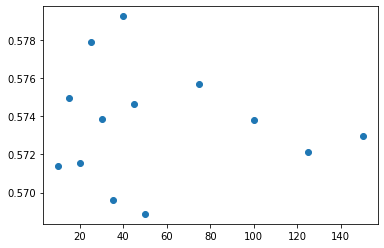

In [68]:
import matplotlib.pyplot as plt

xs = [10,15,20,25,30,35,40,45,50,75,100,125,150]
ys = []
for max_depth in xs:
    model=DecisionTreeClassifier(max_depth=max_depth)
    y_pred = model.fit(X_train, y_train).predict(X_test)
    precision= precision_score(y_test, y_pred, pos_label=1)
    ys.append(precision)
    print(precision)
    
plt.scatter(xs,ys)


## Grid search Cross-Validation

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer
#from sklearn.datasets import make_moons
#X, y = make_moons()

model=DecisionTreeClassifier()
param_grid = {'max_depth': [10,30,40,50,75,100,150]}
search = GridSearchCV(model, param_grid, cv=5, scoring='precision')
search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [10, 30, 40, 50, 75, 100, 150]},
             scoring='precision')

In [46]:
print(search.cv_results_)
print(search.best_params_)
print(search.best_score_)
print(search.best_estimator_)
print(precision_score(y_test, search.best_estimator_.predict(X_test)))


{'mean_fit_time': array([0.34348731, 0.88390608, 1.05509596, 1.14780159, 1.22365084,
       1.22596092, 1.25164461]), 'std_fit_time': array([0.00723459, 0.04401051, 0.09068114, 0.13137347, 0.19271492,
       0.19223316, 0.19729506]), 'mean_score_time': array([0.00200214, 0.00260224, 0.00260224, 0.00300293, 0.00280271,
       0.00300269, 0.00260229]), 'std_score_time': array([2.43140197e-07, 4.90193483e-04, 4.90485409e-04, 7.74768677e-07,
       4.00590911e-04, 2.78041453e-07, 4.90427131e-04]), 'param_max_depth': masked_array(data=[10, 30, 40, 50, 75, 100, 150],
             mask=[False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'max_depth': 10}, {'max_depth': 30}, {'max_depth': 40}, {'max_depth': 50}, {'max_depth': 75}, {'max_depth': 100}, {'max_depth': 150}], 'split0_test_score': array([0.50730159, 0.51139436, 0.49920677, 0.49951877, 0.48832778,
       0.48325359, 0.49309852]), 'split1_test_score': array([0.50779453, 0.475

In [49]:
from sklearn.model_selection import cross_val_score
cross_val_score(DecisionTreeClassifier(max_depth=100), X_train, y_train, cv=5, scoring='precision')

array([0.47655502, 0.49414271, 0.50886194, 0.50723938, 0.51204535])

## Randomized Search Cross-Validation

In [50]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint, expon


model=DecisionTreeClassifier()
distributions = {'max_depth': randint(low=5, high=150)}
# distributions = {'max_depth': uniform(loc=5, scale=150)}
search = RandomizedSearchCV(model, distributions, cv=5, scoring='precision', random_state=0, n_iter=10)
search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D3A6220580>},
                   random_state=0, scoring='precision')

In [51]:
print(search.cv_results_)
print(search.best_params_)
print(search.best_score_)
print(search.best_estimator_)
print(precision_score(y_test, search.best_estimator_.predict(X_test)))


{'mean_fit_time': array([1.15630608, 1.22436738, 1.21181641, 1.22144012, 0.45220981,
       0.78651233, 1.0542047 , 1.22329807, 1.21746264, 1.22117577]), 'std_fit_time': array([0.14128597, 0.19777325, 0.18940798, 0.19881366, 0.00344236,
       0.02875074, 0.08591347, 0.19788269, 0.19269236, 0.19759587]), 'mean_score_time': array([0.00300283, 0.0030025 , 0.00280271, 0.00280323, 0.00207367,
       0.00240207, 0.00220213, 0.00260258, 0.00267425, 0.00260196]), 'std_score_time': array([1.78416128e-07, 3.23406696e-07, 4.00352677e-04, 4.00497275e-04,
       1.43456489e-04, 4.90563269e-04, 4.00495827e-04, 4.90368632e-04,
       4.18236712e-04, 4.89765515e-04]), 'param_max_depth': masked_array(data=[52, 122, 72, 108, 14, 26, 41, 92, 75, 93],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'params': [{'max_depth': 52}, {'max_depth': 122}, {'max_depth': 72}, {'max_depth': 108}, {'max_dep

## Model Selection

Esto estaría bien correrlo en tu pedazo de ordenador tocho, con n_iters = 1000 o algo asi

In [70]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint, expon
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix


models = [
    ("Dummy", DummyClassifier(strategy='most_frequent'),{}),
    ("kneighbors", KNeighborsClassifier(), {'n_neighbors': randint(low=5, high=150)}),
    # ("svc", SVC(kernel="linear", gamma="auto"), {'C': expon(loc=0.0001, scale=100)}), # https://stats.stackexchange.com/questions/43943/which-search-range-for-determining-svm-optimal-c-and-gamma-parameters
    ("decissiontree", DecisionTreeClassifier(), {'max_depth': randint(low=5, high=150)}),
    ("randomforest", RandomForestClassifier(), {'max_depth': randint(low=5, high=150), 'n_estimators': randint(low=5, high=50), 'max_features': randint(low=1, high=2)}),
    ("adaboost", AdaBoostClassifier(), {}),
    ("gaussiannb", GaussianNB(), {}),
    ("quadraticdiscriminant", QuadraticDiscriminantAnalysis(), {}),
]

n_iters = 10

results = []

for model_name, model, params_distrib in models:
    print(f"training {model_name}")
    search = RandomizedSearchCV(model, params_distrib, cv=5, scoring='precision', random_state=0, n_iter=n_iters)
    search.fit(X_train, y_train)
    print(search.best_params_)
    print(search.best_score_)
    print(search.best_estimator_)
    y_pred = search.best_estimator_.predict(X_test)
    test_precision = precision_score(y_test, y_pred)
    test_accuracy = accuracy_score(y_test, y_pred)
    results.append({
        'model_name': model_name,
        'best_estimator': search.best_estimator_,
        'best_params': search.best_params_,
        'best_score': search.best_score_,
        'test_precision': precision_score(y_test, y_pred),
        'test_accuracy': accuracy_score(y_test, y_pred),
        'test_recall': recall_score(y_test, y_pred),
        'test_confusion_matrix': confusion_matrix(y_test, y_pred),
        # 'cv_results': search.cv_results,
    })

training Dummy
{}
0.5070004861448713
DummyClassifier(strategy='most_frequent')
training kneighbors


c:\users\gonzy\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'n_neighbors': 26}
0.5123801991941078
KNeighborsClassifier(n_neighbors=26)
training decissiontree
{'max_depth': 72}
0.5150249416661904
DecisionTreeClassifier(max_depth=72)
training randomforest
{'max_depth': 63, 'max_features': 1, 'n_estimators': 6}
0.5086828495118383
RandomForestClassifier(max_depth=63, max_features=1, n_estimators=6)
training adaboost


c:\users\gonzy\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{}
0.5069523751509051
AdaBoostClassifier()
training gaussiannb
{}
0.5018767326338656
GaussianNB()
training quadraticdiscriminant


c:\users\gonzy\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\users\gonzy\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\users\gonzy\appdata\local\programs\python\python38\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\gonzy\appdata\local\programs\python\python38\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\gonzy\appdata\local\programs\python\python38\lib\site-packages\sklearn\discrimi

{}
0.5169064804701187
QuadraticDiscriminantAnalysis()


In [73]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint, expon
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix


models = [
    ("Dummy", DummyClassifier(strategy='most_frequent'),{}),
    ("kneighbors", KNeighborsClassifier(), {'n_neighbors': [5,10,15,25,35,50,100]}),
    # ("svc", SVC(kernel="linear", gamma="auto"), {'C': expon(loc=0.0001, scale=100)}), # https://stats.stackexchange.com/questions/43943/which-search-range-for-determining-svm-optimal-c-and-gamma-parameters
    ("decissiontree", DecisionTreeClassifier(), {'max_depth': [5,10,15,25,35,50,100]}),
    ("randomforest", RandomForestClassifier(), {'max_depth': [5,10,15,25,35,50,100], 'n_estimators': [10,30,100], 'max_features': [1,2,5,10]}),
    ("adaboost", AdaBoostClassifier(), {}),
    ("gaussiannb", GaussianNB(), {}),
    ("quadraticdiscriminant", QuadraticDiscriminantAnalysis(), {}),
]

n_iters = 1

results = []

for model_name, model, params_distrib in models:
    print(f"training {model_name}")
    search = GridSearchCV(model, params_distrib, cv=5, scoring='precision')
    search.fit(X_train, y_train)
    print(search.best_params_)
    print(search.best_score_)
    print(search.best_estimator_)
    y_pred = search.best_estimator_.predict(X_test)
    test_precision = precision_score(y_test, y_pred)
    test_accuracy = accuracy_score(y_test, y_pred)
    results.append({
        'model_name': model_name,
        'best_estimator': search.best_estimator_,
        'best_params': search.best_params_,
        'best_score': search.best_score_,
        'test_precision': precision_score(y_test, y_pred),
        'test_accuracy': accuracy_score(y_test, y_pred),
        'test_recall': recall_score(y_test, y_pred),
        'test_confusion_matrix': confusion_matrix(y_test, y_pred),
        # 'cv_results': search.cv_results,
    })

training Dummy
{}
0.5070004861448713
DummyClassifier(strategy='most_frequent')
training kneighbors
{'n_neighbors': 25}
0.5158479241650529
KNeighborsClassifier(n_neighbors=25)
training decissiontree
{'max_depth': 100}
0.5131146501541225
DecisionTreeClassifier(max_depth=100)
training randomforest
{'max_depth': 15, 'max_features': 2, 'n_estimators': 10}
0.5152497902185533
RandomForestClassifier(max_depth=15, max_features=2, n_estimators=10)
training adaboost
{}
0.5068331948804344
AdaBoostClassifier()
training gaussiannb
{}
0.5018767326338656
GaussianNB()
training quadraticdiscriminant
{}
0.5169064804701187
QuadraticDiscriminantAnalysis()


c:\users\gonzy\appdata\local\programs\python\python38\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\gonzy\appdata\local\programs\python\python38\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\gonzy\appdata\local\programs\python\python38\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\gonzy\appdata\local\programs\python\python38\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\gonzy\appdata\local\programs\python\python38\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\gonzy\appdata\local\programs\python\pytho

In [71]:
df_results = pd.DataFrame(results)
df_results

,model_name,best_estimator,best_params,best_score,test_precision,test_accuracy,test_recall,test_confusion_matrix
0,Dummy,DummyClassifier(strategy='most_frequent'),{},0.507000,0.568349,0.568349,1.000000,"[[0, 3805], [0, 5010]]"
1,kneighbors,KNeighborsClassifier(n_neighbors=26),{'n_neighbors': 26},0.512380,0.573470,0.501645,0.480639,"[[2014, 1791], [2602, 2408]]"
2,decissiontree,DecisionTreeClassifier(max_depth=72),{'max_depth': 72},0.515025,0.574831,0.509359,0.525150,"[[1859, 1946], [2379, 2631]]"
3,randomforest,"(DecisionTreeClassifier(max_depth=63, max_feat...","{'max_depth': 63, 'max_features': 1, 'n_estima...",0.508683,0.564795,0.480091,0.371457,"[[2371, 1434], [3149, 1861]]"
4,adaboost,"(DecisionTreeClassifier(max_depth=1, random_st...",{},0.506952,0.571314,0.512309,0.568463,"[[1668, 2137], [2162, 2848]]"
5,gaussiannb,GaussianNB(),{},0.501877,0.562649,0.503120,0.564671,"[[1606, 2199], [2181, 2829]]"
6,quadraticdiscriminant,QuadraticDiscriminantAnalysis(),{},0.516906,0.561287,0.509019,0.623353,"[[1364, 2441], [1887, 3123]]"
